<a href="https://colab.research.google.com/github/mmaghajani/RL-up-running/blob/main/bandit_with_probabilistic_rewards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### epsilon greedy


In [12]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [3, 6, 10]

In [13]:
class Bandit:
  def __init__(self, mean, var):
    self.mean = mean
    self.var = var
    self.p_estimate = 0.
    self.N = 0

  def pull(self):
    return np.random.normal(loc=self.mean, scale=self.var)

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x ) / self.N

In [16]:
def experiment():
  bandits = [Bandit(mean=p, var=2) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([bandit.mean for bandit in bandits])
  print("optimal j: ", optimal_j)

  for i in range(NUM_TRIALS):

    if np.random.random() < EPS:
      num_times_explored += 1 
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  
  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate: 3.223266285173581
mean estimate: 6.363806923730746
mean estimate: 10.074029090499975
total reward earned: 19259.781495820665
overall win rate: 9.629890747910332
num_times_explored: 203
num_times_exploited: 1797
num times selected optimal bandit: 1841


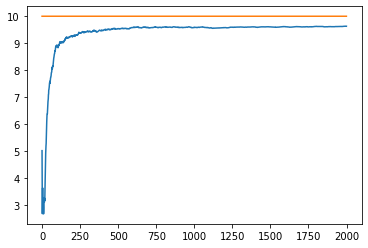

In [19]:
experiment()

### Upper Confidence Bound

In [21]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [3, 6, 10]

In [25]:
class Bandit:
  def __init__(self, mean, var):
    self.mean = mean
    self.var = var
    self.p_estimate = 0.
    self.N = 0

  def pull(self):
    return np.random.normal(loc=self.mean, scale=self.var)

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x ) / self.N

In [33]:
def experiment(c=1):
  bandits = [Bandit(mean=p, var=2) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_optimal = 0
  optimal_j = np.argmax([bandit.mean for bandit in bandits])
  print("optimal j: ", optimal_j)

  for i in range(NUM_TRIALS):

    j = np.argmax([bandit.p_estimate + c*np.sqrt(np.log1p(i)/bandit.N) for bandit in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected optimal bandit:", num_optimal)

  
  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate: 3.467544093960941
mean estimate: 7.020415846896091
mean estimate: 10.029329892450741
total reward earned: 20046.080171011832
overall win rate: 10.023040085505915
num times selected optimal bandit: 1997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


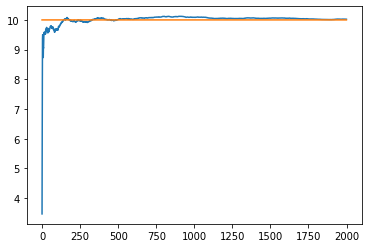

In [37]:
experiment(c=1)

optimal j:  2
mean estimate: 3.143880497374656
mean estimate: 5.939213218268237
mean estimate: 9.988518427619923
total reward earned: 15583.460329698657
overall win rate: 7.791730164849328
num times selected optimal bandit: 1149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


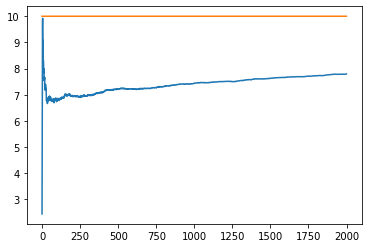

In [38]:
experiment(c=100)

optimal j:  2
mean estimate: 3.13922389266276
mean estimate: 6.895238436293186
mean estimate: 10.001745977414073
total reward earned: 19993.522925202225
overall win rate: 9.996761462601112
num times selected optimal bandit: 1998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


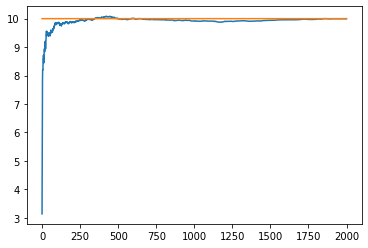

In [41]:
experiment(c=0.1)